<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Advent-of-code-2019" data-toc-modified-id="Advent-of-code-2019-1">Advent of code 2019</a></span><ul class="toc-item"><li><span><a href="#Day-8" data-toc-modified-id="Day-8-1.1">Day 8</a></span><ul class="toc-item"><li><span><a href="#Part-1" data-toc-modified-id="Part-1-1.1.1">Part 1</a></span></li><li><span><a href="#Part-2" data-toc-modified-id="Part-2-1.1.2">Part 2</a></span></li></ul></li></ul></li></ul></div>

# Advent of code 2019

https://adventofcode.com/2019

## Day 8

### Part 1

In [23]:
input_file = 'input/input_day08.txt'
with open(input_file, 'r') as fin:
    data = fin.readline().strip()
    data = [int(u) for u in data]

In [26]:
def get_img(data, cols=25, rows=6):
    img_size = cols*rows
    n_layers = len(data) // img_size

    img = []
    for i in range(n_layers):
        layer = []
        for t in range(rows):
            ind_start = img_size*i + cols*t
            ind_end = img_size*i + cols*(t+1)
            layer.append(data[ind_start:ind_end])
        img.append(layer)
    
    return img

In [27]:
img = get_img(data)

In [36]:
def count_number(layer, num):
    return sum([1 if u == num else 0 for row in layer for u in row])

In [39]:
ind_layer = 0
zeros = len(img[0][0])*len(img[0]) + 1

for i, layer in enumerate(img):
    sum_zeros = count_number(layer, 0)
    if sum_zeros < zeros:
        zeros = sum_zeros
        ind_layer = i

In [41]:
layer = img[ind_layer]

In [42]:
count_number(layer, 1) * count_number(layer, 2)

1920

### Part 2

In [70]:
def test_img(f):
    img = get_img([int(u) for u in '0222112222120000'], 2, 2)
    assert f(img) == [[0, 1],
                      [1, 0]]

In [71]:
def get_final_img(img):
    n_layers = len(img)
    n_rows = len(img[0])
    n_cols = len(img[0][0])

    new_img = [[2 for _ in range(n_cols)] for _ in range(n_rows)]

    for i in range(n_rows):
        for j in range(n_cols):
            for k in range(n_layers):
                if img[k][i][j] != 2:
                    new_img[i][j] = img[k][i][j]
                    break

    return new_img

In [72]:
test_img(get_final_img)

In [73]:
final_img = get_final_img(img)

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

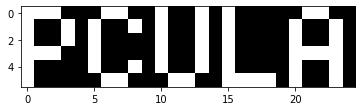

In [76]:
plt.imshow(final_img, cmap='gray');